<a href="https://colab.research.google.com/github/GreatLearningAIML1/delhi-may19-batch-Trapti04/blob/master/Face_recognition_Questions_Project_CV_AIML_Online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [0]:
%tensorflow_version 2.x

In [2]:
import tensorflow
tensorflow.__version__

'2.2.0-rc2'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Change current working directory to project folder (1 mark)

In [4]:
#### Add your code here ####
import os
cd = os.getcwd()
print(cd)

/content


In [0]:
project_path = "/content/drive/My Drive/Computer vision/ACV/ACV_Project_2_FaceRecognition/"

In [0]:
os.chdir(project_path)

### Extract the zip file (2 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [7]:
#### Add your code here ####
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "Aligned Face Dataset.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!')

Extracting all the files now...


KeyboardInterrupt: ignored

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) # join This method returns a string which represents the concatenated path components.
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (2 marks)
- Load one image using the function "load_image"

In [9]:
#### Add your code here ####
load_image(project_path + "PINS/pins_Aaron Paul/Aaron Paul168_268.jpg")

array([[[123,  20,   5],
        [123,  20,   5],
        [123,  20,   5],
        ...,
        [246, 246, 246],
        [253, 253, 253],
        [255, 255, 255]],

       [[123,  20,   5],
        [123,  20,   5],
        [124,  21,   6],
        ...,
        [248, 248, 248],
        [253, 253, 253],
        [255, 255, 255]],

       [[124,  21,   6],
        [124,  21,   6],
        [125,  22,   7],
        ...,
        [251, 251, 251],
        [254, 254, 254],
        [255, 255, 255]],

       ...,

       [[203, 123,  26],
        [203, 123,  26],
        [198, 118,  21],
        ...,
        [249, 248, 130],
        [249, 247, 136],
        [249, 246, 139]],

       [[190, 108,   9],
        [192, 110,  10],
        [195, 113,  13],
        ...,
        [252, 251, 133],
        [252, 250, 139],
        [252, 249, 142]],

       [[188, 106,   6],
        [192, 110,  10],
        [195, 113,  11],
        ...,
        [251, 250, 134],
        [252, 250, 139],
        [252, 249, 142]]

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (2 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
model = vgg_face()
model.load_weights('vgg_face_weights.h5')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [14]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


In [15]:
print((np.expand_dims(img, axis=0)).shape)

(1, 224, 224, 3)


In [16]:
embedding_vector.shape

(2622,)

### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [23]:
print(len(metadata))

10770


In [0]:
embeddings = []

In [24]:

for i, data in enumerate(metadata):
    # Get embedding vector for images in the metadata using the pre-trained model
    #img_path = metadata[i].image_path()
    img_path = data.image_path()
    img = load_image(img_path)

    # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
    img = (img / 255.).astype(np.float32)

    img = cv2.resize(img, dsize = (224,224))
    #print(img.shape)

    # Obtain embedding vector for an image
    # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    #print(embedding_vector.shape)
    embeddings.append(embedding_vector)
    

TypeError: ignored

In [26]:
print(len(embeddings))

9489


#NOTE: 
There was an error while the embedding program run after 2 hrs and I have had to truncate the dataset to 9489. This is handled thru the program to work with the dataset limit[ so, lenths of test/ train ) are lesser. Still teh results are correct.

In [0]:
import pickle

In [0]:
with open('dataset_faces.dat', 'wb') as f:
    pickle.dump(embeddings, f)

In [0]:
with open('dataset_faces.dat', 'rb') as f:
	embeddings = pickle.load(f)

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

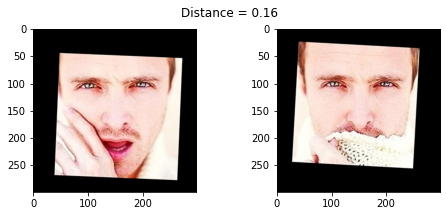

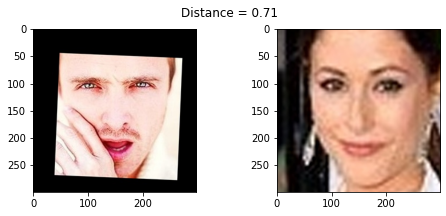

In [31]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

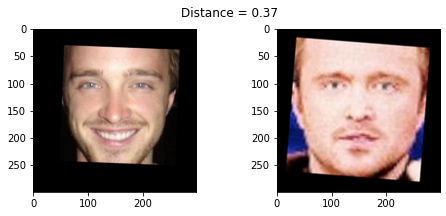

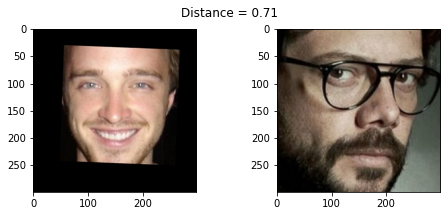

In [32]:
show_pair(30, 31)
show_pair(30, 100)

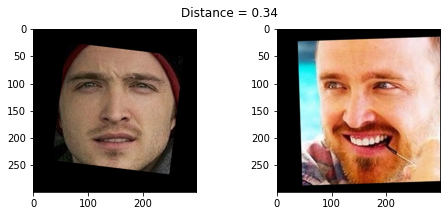

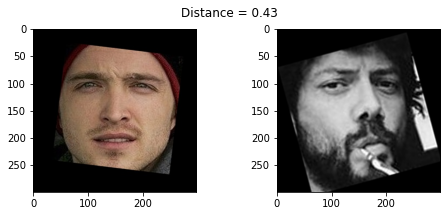

In [33]:
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
X_train = []
X_test = []
y_train = []
y_test = []

In [60]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

#### Add your code here ####
train_idx

array([False,  True,  True, ...,  True,  True,  True])

In [61]:
test_idx

array([ True, False, False, ..., False, False, False])

In [0]:
for id, val in enumerate(train_idx):
    if val == True and id < 9489:
        X_train.append(embeddings[id])
        y_train.append(metadata[id].name)
for id, val in enumerate(test_idx):
    if val == True and id < 9489:
        X_test.append(embeddings[id])
        y_test.append(metadata[id].name)

### Encode the Labels (3 marks)
- Encode the targets
- Use LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder

In [65]:
len(y_train)

8434

In [66]:
le = LabelEncoder()
le.fit(y_train)
le.transform(y_test)

array([ 0,  0,  0, ..., 85, 85, 85])

### Standardize the feature values (3 marks)
- Scale the features using StandardScaler

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler

#### Add your code here ####

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Reduce dimensions using PCA (3 marks)
- Reduce feature dimensions using Principal Component Analysis

In [72]:
print(X_train.shape)

(8434, 2622)


In [73]:
from sklearn.decomposition import PCA
from time import time
#### Add your code here ####
# Compute a PCA (eigenfaces) on the face dataset 
n_components = 150
h, w = X_train.shape

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

#eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


Extracting the top 150 eigenfaces from 8434 faces
done in 5.010s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.374s


In [0]:
target_names = []

for i in os.listdir("PINS"):
    target_names.append(i)
n_classes = len(target_names)

### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [76]:
len(y_train)

8434

In [0]:
from sklearn.svm import SVC

#clf = GridSearchCV( SVC(kernel='rbf', class_weight='balanced'), param_grid)

clf = SVC(kernel='rbf') 
clf = clf.fit(X_train_pca, y_train)


In [85]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))



Predicting people's names on the test set
done in 1.838s


In [87]:
#print(classification_report(y_test, y_pred, target_names=target_names))
print(classification_report(y_test, y_pred))

                               precision    recall  f1-score   support

              pins_Aaron Paul       1.00      0.90      0.95        10
            pins_Alvaro Morte       0.83      1.00      0.91        10
             pins_Amanda Crew       1.00      1.00      1.00        13
          pins_Amaury Nolasco       1.00      0.92      0.96        13
               pins_Anna Gunn       1.00      1.00      1.00         7
    pins_Benedict Cumberbatch       1.00      0.89      0.94         9
            pins_Betsy Brandt       1.00      1.00      1.00         8
        pins_Brenton Thwaites       0.93      0.93      0.93        14
            pins_Brit Marling       1.00      0.86      0.92        14
          pins_Bryan Cranston       1.00      0.89      0.94         9
              pins_Caity Lotz       0.92      0.92      0.92        13
        pins_Cameron Monaghan       1.00      0.92      0.96        13
          pins_Chance Perdomo       1.00      0.89      0.94         9
     

### Test results (1 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

In [92]:
X_test_pca.shape

(1055, 150)

In [0]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 100

example_image = load_image(metadata[test_idx][example_idx].image_path())
#print(example_image)


In [113]:
# Get embedding vector for first image in the metadata using the pre-trained model

#img_path = metadata[0].image_path()
#img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (example_image / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


['pins_Bryan Cranston']


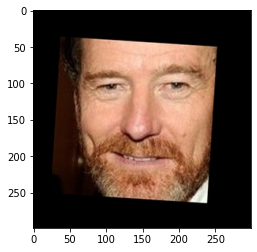

In [117]:
ex = scaler.transform(embedding_vector.reshape(1, -1))
ex = pca.transform(ex)

example_prediction = clf.predict(ex)
print(example_prediction)


plt.imshow(example_image)
